In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemploymentdataset/Unemployment_Rate_Datsaset.csv


In [4]:
# data processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/kaggle/input/unemploymentdataset/Unemployment_Rate_Datsaset.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.rename(columns={'Region.1': 'Area'}, inplace=True)

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                      267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
longitude                                         float64
latitude                                          float64
dtype: object

In [13]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat


,count,unique,top,freq
Region,267,27,Andhra Pradesh,10
Frequency,267,1,M,267
Area,267,5,North,79


In [14]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summary statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,min,25%,50%,75%,max,std
Date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
Estimated Unemployment Rate (%),267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
Estimated Employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
Estimated Labour Participation Rate (%),267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


In [15]:
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


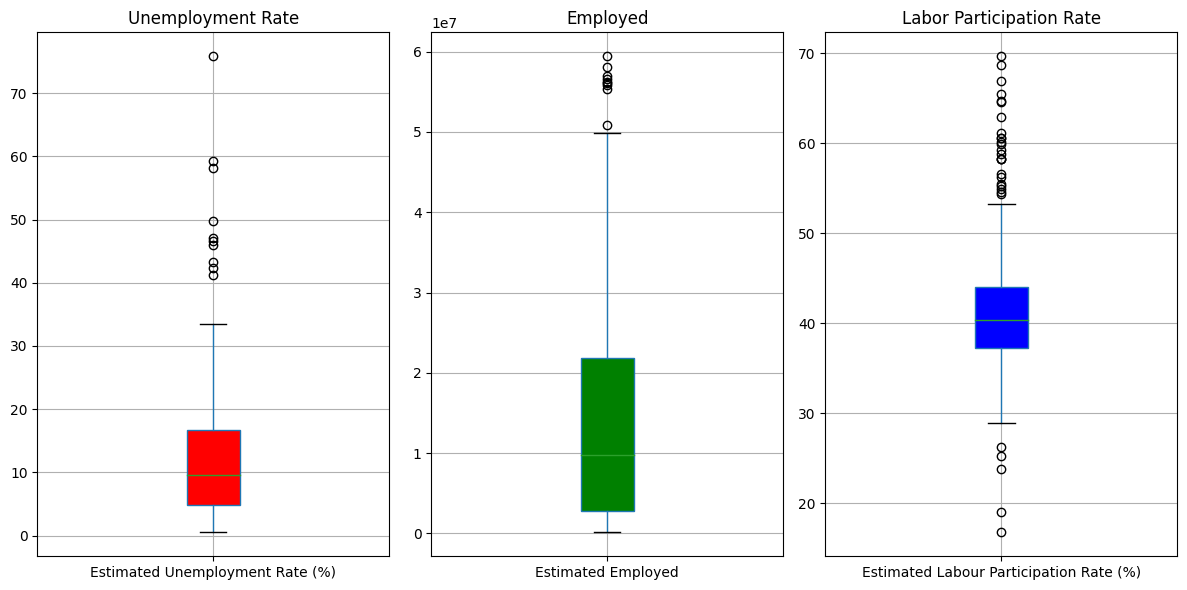

In [19]:
colors = ['red', 'green', 'blue']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labour Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

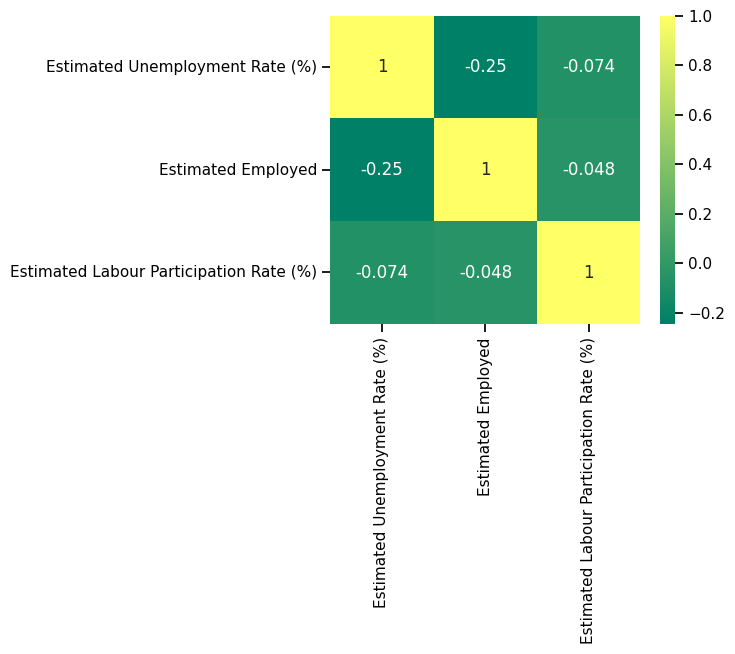

In [22]:
heat_maps=df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']]
heat_maps=heat_maps.corr()

plt.figure(figsize=(5,4))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='summer');

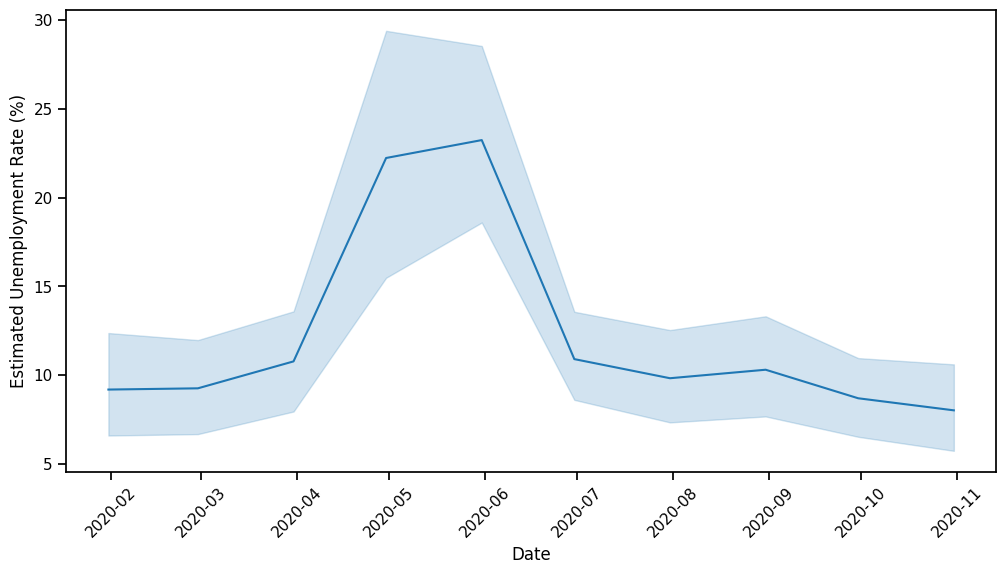

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [24]:
i

In [25]:
fig = px.violin(
    df,
    x='Area',
    y='Estimated Unemployment Rate (%)',
    title='Distribution of Unemployment Rates by Areas',
    box=True,  # Include box plot inside the violin
    points='all',  # Show individual data points
)

fig.show()

In [26]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate (%)',
    color='Region',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

In [27]:
df['Month'] = df['Date'].dt.month
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,2
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,3
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,4
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,6
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,7
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,8
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,9


<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

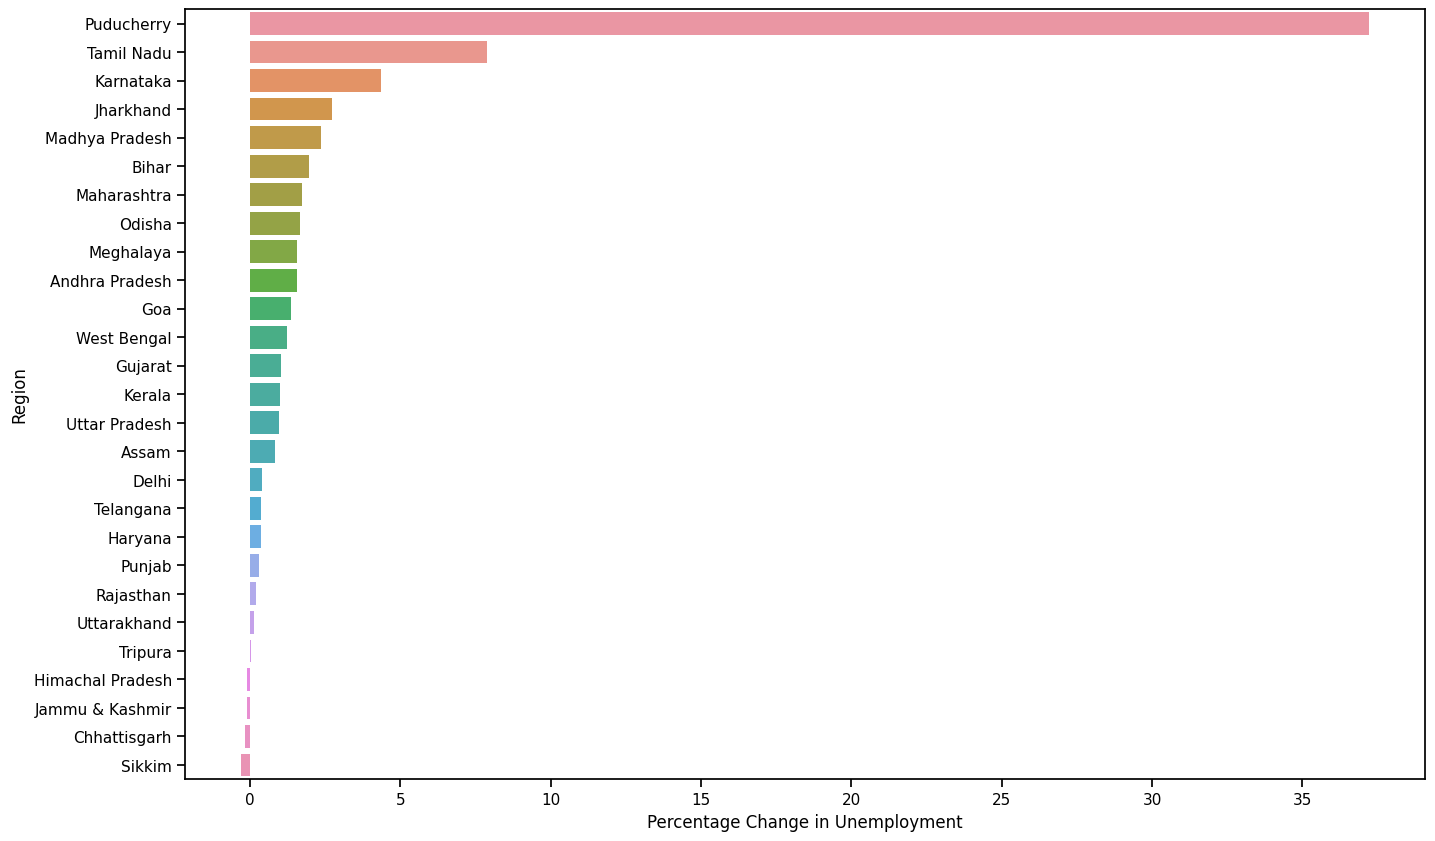

In [28]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]
# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]
before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})
after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'}) 
before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')